In [2]:
# authenticate google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install necessary libraries
!pip install geopandas
!pip install mapclassify

In [4]:
# import necessary libraries
import os, glob
from matplotlib import pyplot as plt
import geopandas as gpd
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime

# change working directory and assign the file name
os.chdir(r'/content/drive/My Drive/KathmanduUrbanGrowth/urban_growth_GWLR/')

infile_epoch1 = r'output/220209_Kathmandu_Epoch1_GWR_Output_utm45n_PT_V1.shp'
infile_epoch2 = r'output/220209_Kathmandu_epoch2_GWR_Output_utm45n_PT_V1.shp'

In [5]:
# read the shapefile
boundary_gpd = gpd.read_file(r'./shapefile/220209_KathmanduMunicipalBoundary_py_utm45n_PT_V1.shp')
gdf_epoch1 = gpd.read_file(os.path.join(os.getcwd(), infile_epoch1))
gdf_epoch2 = gpd.read_file(os.path.join(os.getcwd(), infile_epoch2))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

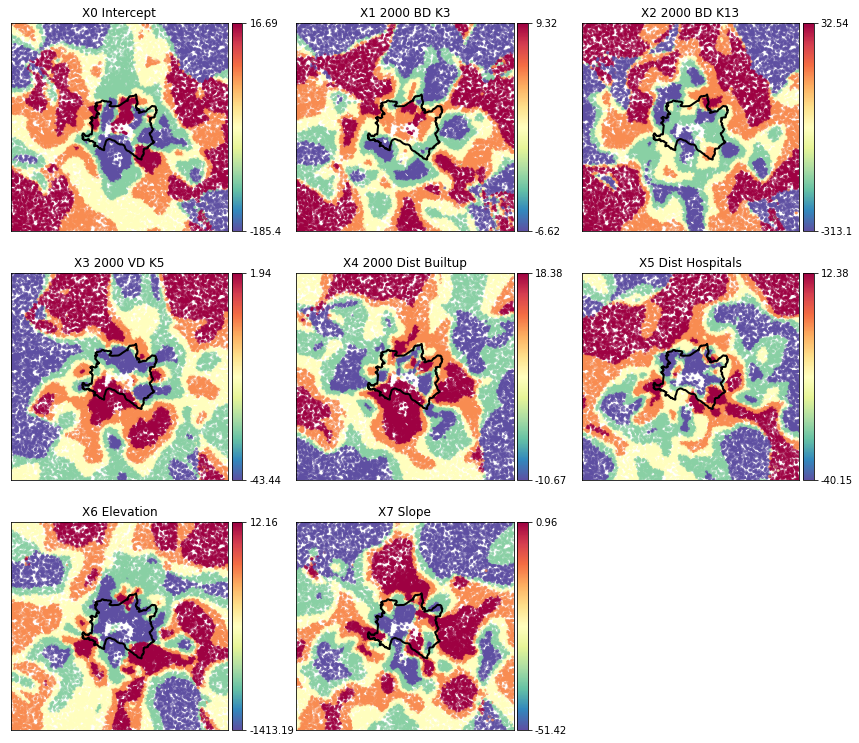

In [29]:
# plot all the derived coefficients
variables = ['Intercept', '2000_BD_K3', '2000_BD_K13', '2000_VD_K5', '2000_dist_builtup',
             'dist_hospitals', 'elevation', 'slope']
variables_title = ['Intercept', '2000_BD_K3', '2000_BD_K13', '2000_VD_K5', '2000_Dist_Builtup',
             'Dist_Hospitals', 'Elevation', 'Slope']

plot_rows, plot_cols = 3, 3
fig, ax = plt.subplots(plot_rows, plot_cols)
fig.set_figheight(13)
fig.set_figwidth(14.5)

for n in range(len(variables)):
  key = 'x%d' % (n)

  y_index = n // plot_rows
  x_index = n % plot_rows

  quantiles = np.quantile(gdf_epoch1[key], [0.001, .20, .40, .60, .80, .99])
  temp_gdf = gdf_epoch1[['geometry', key]]
  temp_gdf.loc[temp_gdf[key] < quantiles[0], key] = quantiles[0]
  temp_gdf.loc[temp_gdf[key] > quantiles[-1], key] = quantiles[-1]

  # limit x and y or else it pads by default
  xlim = ([temp_gdf.total_bounds[0],  temp_gdf.total_bounds[2]])
  ylim = ([temp_gdf.total_bounds[1],  temp_gdf.total_bounds[3]])

  ax[y_index, x_index].set_xlim(xlim)
  ax[y_index, x_index].set_ylim(ylim)

  temp_gdf.plot(ax=ax[y_index, x_index],
                column=key,
                scheme='quantiles',
                markersize = 4,
                cmap='Spectral_r',
                alpha=0.6
                )
  boundary_gpd.plot(ax=ax[y_index, x_index], facecolor='none', edgecolor='black', linewidth=2)

  ax[y_index, x_index].set_title(key.upper() + ' ' + variables_title[n].replace('_', ' '))

  # remove lat lon ticks
  ax[y_index, x_index].set_xticks([])
  ax[y_index, x_index].set_yticks([])

  # create a dummy plot for colorbar
  divider = make_axes_locatable(ax[y_index, x_index])
  cax = divider.append_axes("right", size="5%", pad=0.05)
  
  fig2 = ax[y_index, x_index].get_figure()
  sm = plt.cm.ScalarMappable(cmap='Spectral_r')
  sm._A = []
  cbar = fig2.colorbar(sm, cax=cax, fraction=0.046, pad=0.04)

  cbar.set_ticks([0, 1])
  cbar.set_ticklabels(np.round([quantiles[0], quantiles[-1]], 2))

# remove the extra subplot
fig.delaxes(ax[2][2])

# export the figure
outfile = r'./Images/%s_CoefficientSpatialVariation_Epoch1_PT_V2.png' % (datetime.now().strftime('%y%d%m'))
plt.savefig(outfile, dpi=300, format='PNG', bbox_inches='tight', pad_inches = 0)

In [ ]:
gdf_epoch2.keys()

Index(['2010_BD_K1', '2010_VD_K5', 'dist_hospi', 'dist_hotel', 'elevation',
       'growth_10_', 'latitudes', 'longitudes', 'slope', 'x0-Interce',
       'x1-2010_BD', 'x2-2010_VD', 'x3-dist_ho', 'x4-dist_ho', 'x5-elevati',
       'x6-slope', 'geometry'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

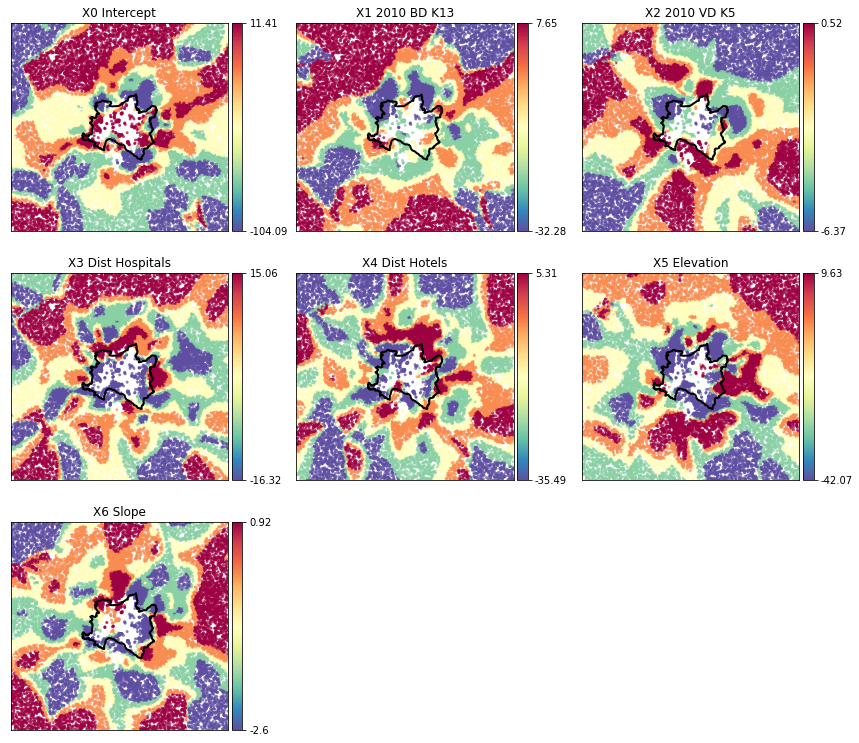

In [28]:
# plot all the derived coefficients
variables_name = ['Intercept', '2010_BD_K13', '2010_VD_K5', 'dist_hospitals', 'dist_hotels', 'elevation', 'slope']
variables_title = ['Intercept', '2010_BD_K13', '2010_VD_K5', 'Dist Hospitals', 'Dist Hotels', 'Elevation', 'Slope']
variables = ['x0-Interce', 'x1-2010_BD', 'x2-2010_VD', 'x3-dist_ho', 'x4-dist_ho', 'x5-elevati', 'x6-slope']

plot_rows, plot_cols = 3, 3
fig, ax = plt.subplots(plot_rows, plot_cols)
fig.set_figheight(13)
fig.set_figwidth(14.5)

for n in range(len(variables)):
  key = variables[n]

  y_index = n // plot_rows
  x_index = n % plot_rows

  quantiles = np.quantile(gdf_epoch2[key], [0.001, .20, .40, .60, .80, .99])
  temp_gdf = gdf_epoch2[['geometry', key]]
  temp_gdf.loc[temp_gdf[key] < quantiles[0], key] = quantiles[0]
  temp_gdf.loc[temp_gdf[key] > quantiles[-1], key] = quantiles[-1]

  # limit x and y or else it pads by default
  xlim = ([temp_gdf.total_bounds[0],  temp_gdf.total_bounds[2]])
  ylim = ([temp_gdf.total_bounds[1],  temp_gdf.total_bounds[3]])

  ax[y_index, x_index].set_xlim(xlim)
  ax[y_index, x_index].set_ylim(ylim)

  temp_gdf.plot(ax=ax[y_index, x_index],
                column=key,
                scheme='quantiles',
                markersize = 4,
                cmap='Spectral_r',
                alpha=0.6
                )
  boundary_gpd.plot(ax=ax[y_index, x_index], facecolor='none', edgecolor='black', linewidth=2)
  
  ax[y_index, x_index].set_title('X%d ' % (n) + variables_title[n].replace('_', ' '))

  # remove lat lon ticks
  ax[y_index, x_index].set_xticks([])
  ax[y_index, x_index].set_yticks([])

  # create a dummy plot for colorbar
  divider = make_axes_locatable(ax[y_index, x_index])
  cax = divider.append_axes("right", size="5%", pad=0.05)
  
  fig2 = ax[y_index, x_index].get_figure()
  sm = plt.cm.ScalarMappable(cmap='Spectral_r')
  sm._A = []
  cbar = fig2.colorbar(sm, cax=cax, fraction=0.046, pad=0.04)

  cbar.set_ticks([0, 1])
  cbar.set_ticklabels(np.round([quantiles[0], quantiles[-1]], 2))

# remove the extra subplot
fig.delaxes(ax[2][2])
fig.delaxes(ax[2][1])

# export the figure
outfile = r'./Images/%s_CoefficientSpatialVariation_Epoch2_PT_V2.png' % (datetime.now().strftime('%y%d%m'))
plt.savefig(outfile, dpi=300, format='PNG', bbox_inches='tight', pad_inches=0)